In [1]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import control

from control.matlab import *
from control import bode_plot as bode
from control import margin as margin

import numpy as np
from ipywidgets import interact, FloatSlider,IntSlider

<IPython.core.display.Javascript object>


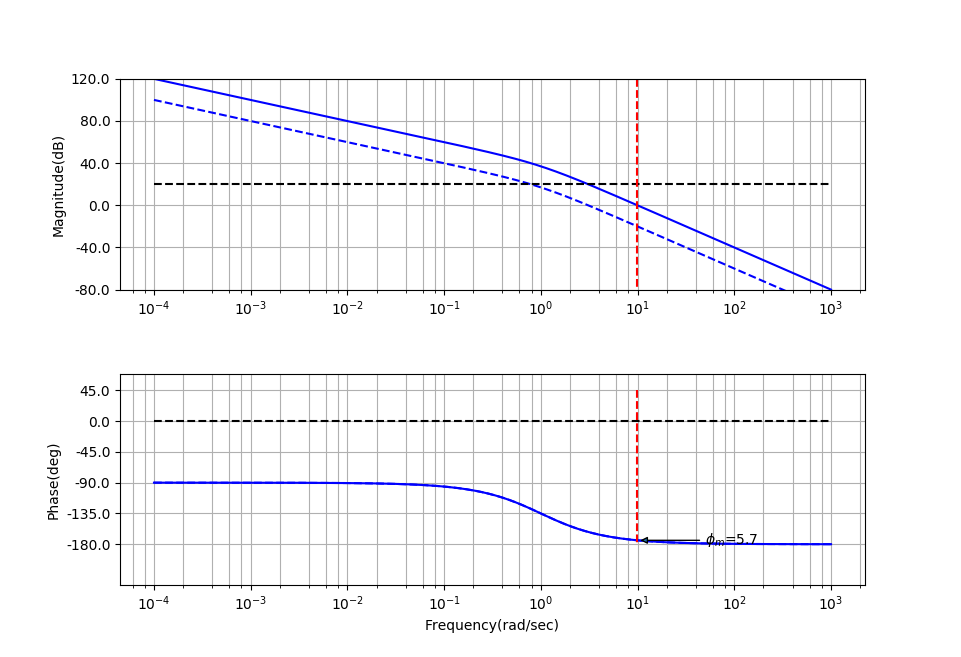

In [2]:
plt.subplots_adjust(hspace=0.4)

num = [10];
den = [1,1,0];
sys = tf(num, den);

omega = np.logspace(-4,3,400);

K = 10
T = 1
a = 1
num = [K*T, K]
den = [a*T, 1]
ctrl = tf(num,den);

magp, phasep, _ = bode(sys, dB=True, Plot=False, omega=omega);

mag, phase, _ = bode(control.series(sys,ctrl), dB=True, Plot=False, omega=omega);
magc, phasec, _ = bode(ctrl, dB=True, Plot=False, omega=omega);
Kg, pm, Wg, Wp = margin(control.series(ctrl,sys))

plt.subplot(211)
plt.semilogx(omega,magp,'b--')
magplot, = plt.semilogx(omega, mag, 'b')
magcplot, = plt.semilogx(omega, magc, 'k--')
magdash, = plt.semilogx([Wg,Wg],[120,-80],'r--')

plt.subplot(212)
plt.semilogx(omega,phasep,'b--')
phaseplot, = plt.semilogx(omega, phase,'b')
phasecplot, = plt.semilogx(omega, phasec,'k--')
phasedash, = plt.semilogx([Wg,Wg],[45,-180],'r--')
phasemargin = plt.annotate('$\phi_m$=%.1f' % pm, xy=(Wg,pm-180), xytext=(5*Wg,pm-180),
            arrowprops=dict(arrowstyle='-|>'),
            horizontalalignment='left',
            verticalalignment='center', 
            )

plt.subplot(211)    
plt.ylabel('Magnitude(dB)')
yticks = np.linspace(120, -80, 6) 
ylabels = [(str(ytick)) for ytick in yticks]
plt.yticks(yticks, ylabels)
plt.grid(b=True, which='both')
plt.ylim(-80, 120)

plt.subplot(212)
plt.ylabel('Phase(deg)')
plt.xlabel('Frequency(rad/sec)')
yticks = np.linspace(-180, 45, 6) 
ylabels = [(str(ytick)) for ytick in yticks]
plt.yticks(yticks, ylabels)
plt.grid(b=True, which='both')


In [19]:
@interact(KdB = IntSlider(min=-20, max=40, value=20, step=10, description = 'K(dB)'), 
          logT = FloatSlider(min=-1,max=1,value=0, description = 'log(T)'),
          loga = FloatSlider(min=-1,max=2,value=0, description = 'log(a)'))
def plot(KdB, logT, loga):
    
    # remove old plot
    global magplot
    global phaseplot
    global phasemargin
    global magdash
    global phasedash
    global magcplot
    global phasecplot
    magplot.remove()
    phaseplot.remove()
    phasedash.remove()
    magdash.remove()
    phasemargin.remove()
    magcplot.remove()
    phasecplot.remove()
    
    K = np.power(10, KdB/20.)
    T = np.power(10, logT)
    a = np.power(10, loga)
    
    num = [K*T, K]
    den = [a*T, 1]
    ctrl = tf(num,den);
    
    mag, phase, _ = bode(control.series(sys,ctrl), dB=True, Plot=False, omega=omega);
    magc, phasec, _ = bode(ctrl, dB=True, Plot=False, omega=omega);
    Kg, pm, Wg, Wp = margin(control.series(ctrl,sys))

    plt.subplot(211)
    magplot, = plt.semilogx(omega, mag, 'b')
    magcplot, = plt.semilogx(omega, magc, 'k--')
    magdash, = plt.semilogx([Wg,Wg],[120,-80],'r--')

    plt.subplot(212)
    phaseplot, = plt.semilogx(omega, phase,'b')
    phasecplot, = plt.semilogx(omega, phasec,'k--')
    phasedash, = plt.semilogx([Wg,Wg],[45,-180],'r--')
    phasemargin = plt.annotate('$\phi_m$=%.1f' % pm, xy=(Wg,pm-180), xytext=(5*Wg,pm-180),
            arrowprops=dict(arrowstyle='-|>'),
            horizontalalignment='left',
            verticalalignment='center', 
            ) 